## Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Importing Dataset

In [2]:
df=pd.read_csv('telecom_churn.csv')
#to display first 5 records
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Data processing and understanding

In [3]:
#To check no. of rows and columns in dataset
df.shape

(7043, 21)

In [4]:
#To check null values
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### We don't have any missing data

In [5]:
#To check datatypes
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [6]:
#check the descriptive statistics of numeric variables
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


### 75% customers have tenure less than 55 months
### Average Monthly charges are USD 64.76

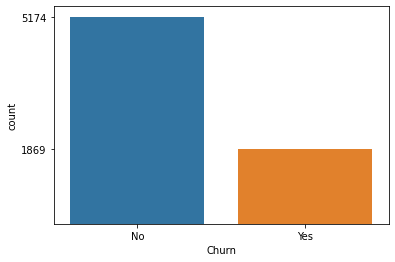

In [7]:
sns.countplot(df['Churn'])
c=df['Churn'].value_counts()
plt.yticks(c)
plt.show()

In [8]:
#To see summary of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [9]:
df["TotalCharges"].value_counts()

           11
20.2       11
19.75       9
20.05       8
19.9        8
           ..
2952.85     1
250.8       1
1902        1
6536.5      1
4985.9      1
Name: TotalCharges, Length: 6531, dtype: int64

In [10]:
df["TotalCharges"].replace(" ",np.nan,inplace=True)

In [11]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [12]:
#change datatype of TotalCharges from object to float
df["TotalCharges"]=df["TotalCharges"].astype("float")

In [13]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [14]:
#find the mean of TotalCharges
m=df["TotalCharges"].mean()
#fill null values of TotalCharges from mean of TotalCharges
df["TotalCharges"].fillna(m,inplace=True)
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

## Exploratory Data Analysis

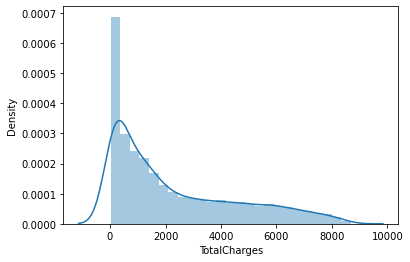

In [15]:
#Density plot
sns.distplot(df['TotalCharges'])
plt.show()

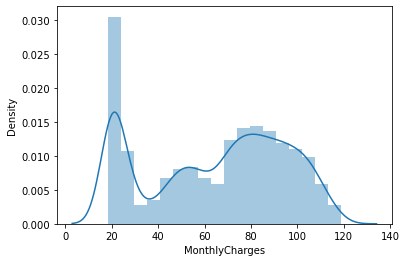

In [16]:
sns.distplot(df['MonthlyCharges'])
plt.show()

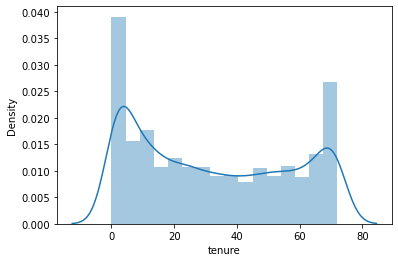

In [17]:
sns.distplot(df['tenure'])
plt.show()

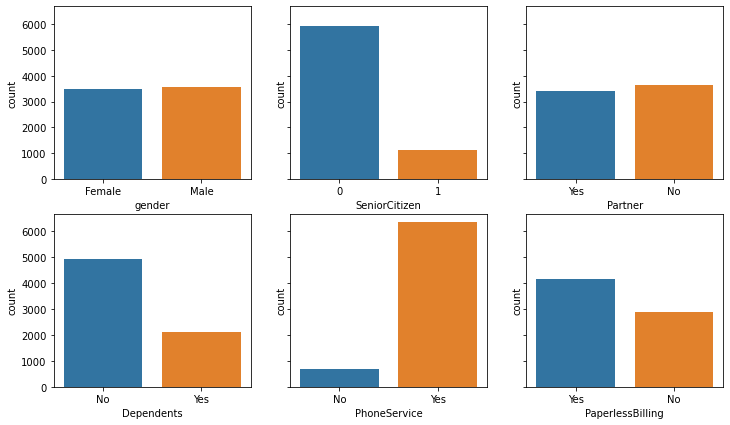

In [18]:
fig, axes = plt.subplots(2, 3, figsize=(12, 7), sharey=True)
sns.countplot(df["gender"], ax=axes[0,0])
sns.countplot(df["SeniorCitizen"], ax=axes[0,1])
sns.countplot(df["Partner"], ax=axes[0,2])
sns.countplot(df["Dependents"], ax=axes[1,0])
sns.countplot(df["PhoneService"], ax=axes[1,1])
sns.countplot(df["PaperlessBilling"], ax=axes[1,2])
plt.show()

## Partner and Dependents

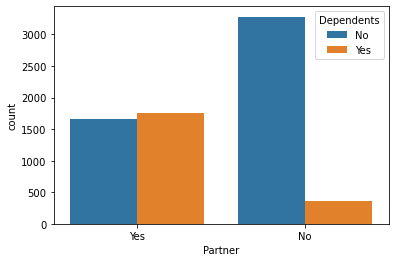

In [19]:
sns.countplot(df['Partner'], hue=df['Dependents'])
plt.show()

## Gender and SeniorCitizen

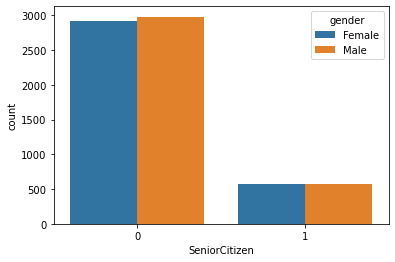

In [20]:
sns.countplot(df['SeniorCitizen'], hue=df['gender'])
plt.show()

## SeniorCitizen and Dependents

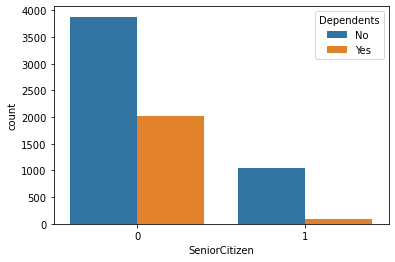

In [21]:
sns.countplot(df['SeniorCitizen'], hue=df['Dependents'])
plt.show()

## Internet Service and Churn

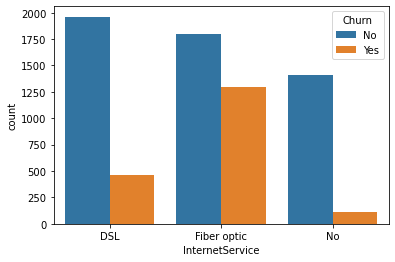

In [22]:
sns.countplot(df['InternetService'], hue=df['Churn'])
plt.show()

## Payment Method and Churn 

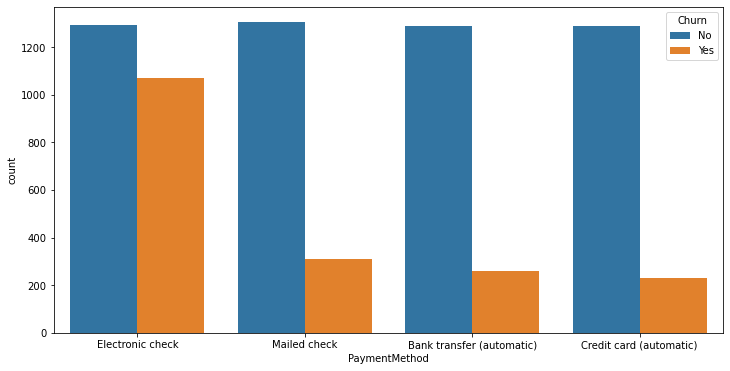

In [23]:
plt.figure(figsize=(12,6))
sns.countplot(df['PaymentMethod'], hue=df['Churn'])
plt.show()

In [24]:
#To remove unwanted column customerID permanently
df.drop("customerID",axis=1,inplace=True)

In [25]:
#separate all object type data and hold in df_cat
df_cat=df.select_dtypes("object")
#separate all numeric type data and hold in df_num
df_num=df.select_dtypes(["float64","int64"])

In [26]:
#To convert object type data to number using LabelEncoder class
from sklearn.preprocessing import LabelEncoder
for col in df_cat:
    #create object of LabelEncoder
    le=LabelEncoder()
    df_cat[col]=le.fit_transform(df_cat[col])

In [27]:
df_cat.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,0
1,1,0,0,1,0,0,2,0,2,0,0,0,1,0,3,0
2,1,0,0,1,0,0,2,2,0,0,0,0,0,1,3,1
3,1,0,0,0,1,0,2,0,2,2,0,0,1,0,0,0
4,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,1


In [28]:
df_new=pd.concat([df_num,df_cat],axis=1)
df_new.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,0,1,29.85,29.85,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,0
1,0,34,56.95,1889.50,1,0,0,1,0,0,2,0,2,0,0,0,1,0,3,0
2,0,2,53.85,108.15,1,0,0,1,0,0,2,2,0,0,0,0,0,1,3,1
3,0,45,42.30,1840.75,1,0,0,0,1,0,2,0,2,2,0,0,1,0,0,0
4,0,2,70.70,151.65,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,1


In [29]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SeniorCitizen     7043 non-null   int64  
 1   tenure            7043 non-null   int64  
 2   MonthlyCharges    7043 non-null   float64
 3   TotalCharges      7043 non-null   float64
 4   gender            7043 non-null   int32  
 5   Partner           7043 non-null   int32  
 6   Dependents        7043 non-null   int32  
 7   PhoneService      7043 non-null   int32  
 8   MultipleLines     7043 non-null   int32  
 9   InternetService   7043 non-null   int32  
 10  OnlineSecurity    7043 non-null   int32  
 11  OnlineBackup      7043 non-null   int32  
 12  DeviceProtection  7043 non-null   int32  
 13  TechSupport       7043 non-null   int32  
 14  StreamingTV       7043 non-null   int32  
 15  StreamingMovies   7043 non-null   int32  
 16  Contract          7043 non-null   int32  


In [30]:
#Select Input and output dataset df
X=df_new.drop("Churn",axis=1)  #input variable
Y=df_new["Churn"]  #output means target

In [31]:
X.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,0,1,29.85,29.85,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2
1,0,34,56.95,1889.50,1,0,0,1,0,0,2,0,2,0,0,0,1,0,3
2,0,2,53.85,108.15,1,0,0,1,0,0,2,2,0,0,0,0,0,1,3
3,0,45,42.30,1840.75,1,0,0,0,1,0,2,0,2,2,0,0,1,0,0
4,0,2,70.70,151.65,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2


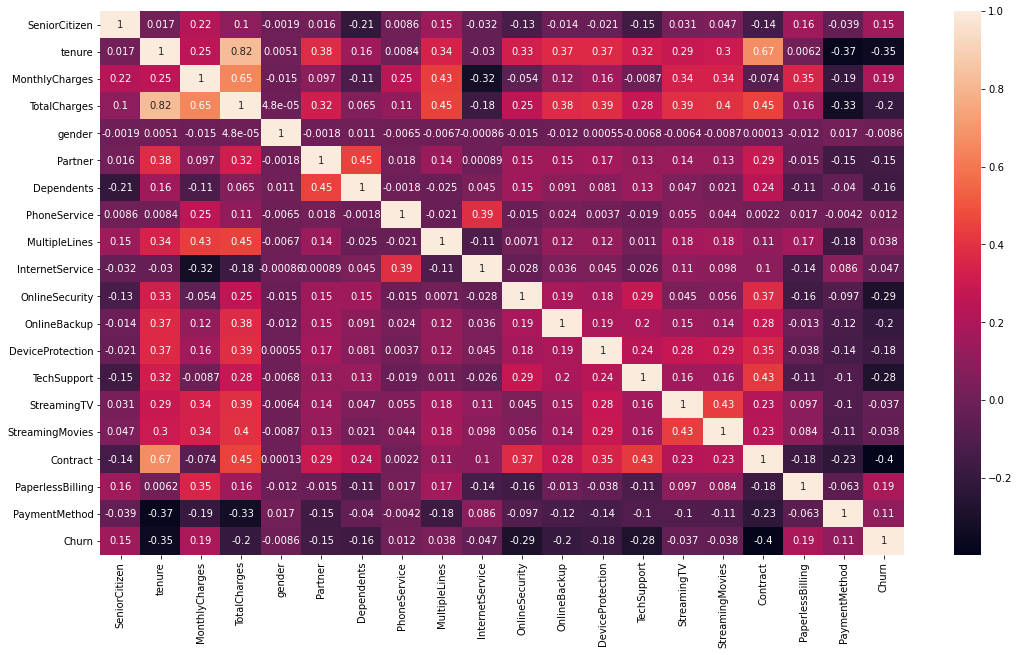

In [32]:
plt.figure(figsize=(18,10))
sns.heatmap(df_new.corr(),annot=True)
plt.show()

## Train-Test Split

In [33]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [34]:
#1. Standardization
from sklearn.preprocessing import StandardScaler

#fit_transform on training data X_train and
#transform on testing data means X_test
#create the object of StandardScaler class
ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)

In [35]:
#Dataset is a classifiaction dataset, we predict customer will churn or not
#First Baseline model :
#create a function
def create_model(model):  #user defined parameter as a object
    model.fit(X_train,Y_train)  #training the model
    Y_pred=model.predict(X_test)  #testing the model
    print(classification_report(Y_test,Y_pred))
    print(confusion_matrix(Y_test,Y_pred))
    return model

In [36]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

## Applying machine learning algorithms

In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
#create the object of LogisticRegression
lr=LogisticRegression()

In [39]:
#call function for train and test the model
lr=create_model(lr)

              precision    recall  f1-score   support

           0       0.86      0.88      0.87      1585
           1       0.63      0.59      0.61       528

    accuracy                           0.81      2113
   macro avg       0.75      0.73      0.74      2113
weighted avg       0.81      0.81      0.81      2113

[[1401  184]
 [ 219  309]]


In [40]:
df["Churn"].value_counts()  #Data Unbalance (imbalance)

No     5174
Yes    1869
Name: Churn, dtype: int64

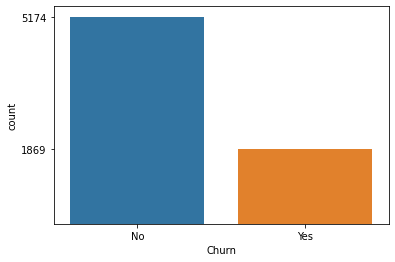

In [41]:
sns.countplot(df['Churn'])
c=df['Churn'].value_counts()
plt.yticks(c)
plt.show()

## Data is unbalance so we first need to balance the data

In [42]:
#!pip install imblearn

In [43]:
#Use randomoversampling
from imblearn.over_sampling import RandomOverSampler

In [44]:
ros=RandomOverSampler(random_state=1)

In [45]:
X_train_ros,Y_train_ros=ros.fit_resample(X_train,Y_train)

In [46]:
pd.Series(Y_train).value_counts()  #check if not balance

0    3589
1    1341
Name: Churn, dtype: int64

In [47]:
pd.Series(Y_train_ros).value_counts()  #check if balance

0    3589
1    3589
Name: Churn, dtype: int64

In [48]:
#Apply randomoversampling on 30% testing data
X_test_ros,Y_test_ros=ros.fit_resample(X_test,Y_test)

In [49]:
pd.Series(Y_test).value_counts()  #check if not balance in testing test

0    1585
1     528
Name: Churn, dtype: int64

In [50]:
pd.Series(Y_test_ros).value_counts()  #check if apply randomover sampling means balance

0    1585
1    1585
Name: Churn, dtype: int64

In [51]:
#Create a user defined function
def create_model1(model):  #user defined parameter as a object
    model.fit(X_train_ros,Y_train_ros)  #training the model
    Y_pred=model.predict(X_test_ros)  #testing the model
    print(classification_report(Y_test_ros,Y_pred))
    print(confusion_matrix(Y_test_ros,Y_pred))
    return model

## Logistic Regression

In [52]:
lr=LogisticRegression()

In [53]:
#call function
lr=create_model1(lr)

              precision    recall  f1-score   support

           0       0.80      0.73      0.77      1585
           1       0.75      0.82      0.79      1585

    accuracy                           0.78      3170
   macro avg       0.78      0.78      0.78      3170
weighted avg       0.78      0.78      0.78      3170

[[1162  423]
 [ 284 1301]]


## DecisionTree Classifier

In [54]:
from sklearn.tree import DecisionTreeClassifier

In [55]:
#create the  object of DecisionTreeClassifier class
dt=DecisionTreeClassifier()  #bydefault gini index

In [56]:
dt=create_model1(dt)

              precision    recall  f1-score   support

           0       0.64      0.82      0.72      1585
           1       0.75      0.53      0.62      1585

    accuracy                           0.68      3170
   macro avg       0.69      0.68      0.67      3170
weighted avg       0.69      0.68      0.67      3170

[[1298  287]
 [ 741  844]]


In [57]:
IG=dt.feature_importances_

In [58]:
X.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'gender',
       'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

In [59]:
dic={'Input':X.columns,'Information_Gain':IG}
df1=pd.DataFrame(dic)
df1.sort_values('Information_Gain',ascending=False)

,Input,Information_Gain
16,Contract,0.229891
2,MonthlyCharges,0.202530
3,TotalCharges,0.179152
1,tenure,0.113849
18,PaymentMethod,0.046733
10,OnlineSecurity,0.043394
5,Partner,0.019973
4,gender,0.019390
0,SeniorCitizen,0.018858
11,OnlineBackup,0.018167


In [60]:
#Applying pruning technique to reduce overfitting
#max_depth=8
dt1=DecisionTreeClassifier(max_depth=6,random_state=1)

In [61]:
dt1=create_model1(dt1)

              precision    recall  f1-score   support

           0       0.80      0.67      0.73      1585
           1       0.72      0.84      0.77      1585

    accuracy                           0.75      3170
   macro avg       0.76      0.75      0.75      3170
weighted avg       0.76      0.75      0.75      3170

[[1065  520]
 [ 261 1324]]


In [62]:
dt2=DecisionTreeClassifier(min_samples_leaf=100,random_state=1)

In [63]:
dt2=create_model1(dt2)

              precision    recall  f1-score   support

           0       0.78      0.70      0.74      1585
           1       0.73      0.80      0.77      1585

    accuracy                           0.75      3170
   macro avg       0.76      0.75      0.75      3170
weighted avg       0.76      0.75      0.75      3170

[[1115  470]
 [ 312 1273]]


In [64]:
#Use entropy method
dt3=DecisionTreeClassifier(criterion='entropy',max_depth=8,random_state=1)

In [65]:
dt3=create_model1(dt3)

              precision    recall  f1-score   support

           0       0.78      0.68      0.73      1585
           1       0.72      0.81      0.76      1585

    accuracy                           0.74      3170
   macro avg       0.75      0.74      0.74      3170
weighted avg       0.75      0.74      0.74      3170

[[1078  507]
 [ 304 1281]]


In [66]:
dt4=DecisionTreeClassifier(criterion='entropy',min_samples_leaf=50,random_state=1)

In [67]:
dt4=create_model1(dt4)

              precision    recall  f1-score   support

           0       0.77      0.76      0.77      1585
           1       0.76      0.77      0.77      1585

    accuracy                           0.77      3170
   macro avg       0.77      0.77      0.77      3170
weighted avg       0.77      0.77      0.77      3170

[[1211  374]
 [ 369 1216]]


## Random Forest Classifier

In [68]:
from sklearn.ensemble import RandomForestClassifier

In [69]:
rfc=RandomForestClassifier(n_estimators=10,max_features=5,min_samples_leaf=50,random_state=1)

In [70]:
rfc=create_model1(rfc)

              precision    recall  f1-score   support

           0       0.78      0.75      0.76      1585
           1       0.76      0.79      0.77      1585

    accuracy                           0.77      3170
   macro avg       0.77      0.77      0.77      3170
weighted avg       0.77      0.77      0.77      3170

[[1181  404]
 [ 334 1251]]


## Boosting

In [71]:
from sklearn.ensemble import AdaBoostClassifier

In [72]:
ada=AdaBoostClassifier(n_estimators=100,random_state=1)

In [73]:
ada=create_model1(ada)

              precision    recall  f1-score   support

           0       0.80      0.73      0.76      1585
           1       0.75      0.82      0.78      1585

    accuracy                           0.77      3170
   macro avg       0.77      0.77      0.77      3170
weighted avg       0.77      0.77      0.77      3170

[[1154  431]
 [ 291 1294]]


In [74]:
from sklearn.ensemble import GradientBoostingClassifier

In [75]:
gbc=GradientBoostingClassifier(n_estimators=100,random_state=1)

In [76]:
gbc=create_model1(gbc)

              precision    recall  f1-score   support

           0       0.80      0.74      0.77      1585
           1       0.75      0.82      0.78      1585

    accuracy                           0.78      3170
   macro avg       0.78      0.78      0.77      3170
weighted avg       0.78      0.78      0.77      3170

[[1165  420]
 [ 293 1292]]


In [77]:
from xgboost import XGBClassifier

In [78]:
xgb=XGBClassifier(n_estimators=10,reg_alpha=1,random_state=1)

In [79]:
xgb=create_model1(xgb)

[12:29:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.79      0.75      0.77      1585
           1       0.76      0.80      0.78      1585

    accuracy                           0.78      3170
   macro avg       0.78      0.78      0.78      3170
weighted avg       0.78      0.78      0.78      3170

[[1189  396]
 [ 316 1269]]


## K-Nearest Neighbour

In [80]:
from sklearn.neighbors import KNeighborsClassifier

In [81]:
knc=KNeighborsClassifier(n_neighbors=7,metric='minkowski',p=2)

In [82]:
knc=create_model1(knc)

              precision    recall  f1-score   support

           0       0.77      0.65      0.71      1585
           1       0.70      0.81      0.75      1585

    accuracy                           0.73      3170
   macro avg       0.73      0.73      0.73      3170
weighted avg       0.73      0.73      0.73      3170

[[1032  553]
 [ 308 1277]]


## Support Vector Machine

In [83]:
from sklearn.svm import LinearSVC

In [84]:
svc=LinearSVC(random_state=1)

In [85]:
svc=create_model1(svc)

              precision    recall  f1-score   support

           0       0.82      0.72      0.77      1585
           1       0.75      0.84      0.79      1585

    accuracy                           0.78      3170
   macro avg       0.78      0.78      0.78      3170
weighted avg       0.78      0.78      0.78      3170

[[1143  442]
 [ 259 1326]]


## Naive Bayes Classifier

In [86]:
from sklearn.naive_bayes import GaussianNB

In [87]:
gnb=GaussianNB()

In [88]:
gnb=create_model(gnb)

              precision    recall  f1-score   support

           0       0.91      0.76      0.83      1585
           1       0.52      0.78      0.62       528

    accuracy                           0.76      2113
   macro avg       0.71      0.77      0.73      2113
weighted avg       0.81      0.76      0.78      2113

[[1204  381]
 [ 118  410]]


### Support Vector Machine algorithm gives 84% recall which is best amongst all the algorithms.